# Sección nueva

This is tutorial one
set your working directory

In [ ]:
#dir.wd<- "/Users/edmun/Library/CloudStorage/OneDrive-Personal/Edmundo-ITESM/2.Cursos Impartidos/Econometrics MEK/MEK/Lectures/Lecture 1/"
#setwd(dir.wd)

do you want to check if this was done correctly? No problem! use the following function:

In [1]:
getwd()

[1] "/content"


did the directory you set using the function setwd() matches? if yes, well done! if not, try it again
Now let's read some data in stata format,
For this, you will install your first library to R,
 Go to "packages in the top menu"
 Select a CRAN mirror, these are servers in which all R stuff is provided
 Select package "foreign"
 Pay attention to the message displayed at the bottom, if it reads something like:
The downloaded binary packages are in
        C:\Users\emolina\AppData\Local\Temp\RtmpMr6plU\downloaded_packages
Then your package is not where you want it to be,
We need to save your package in the location in which your R library is, type the following function to know where your library lives:

In [3]:
.libPaths()

[1] "/usr/local/lib/R/site-library" "/usr/lib/R/site-library"      
[3] "/usr/lib/R/library"


when I execute this in my computer I get: "C:/Users/emolina/Documents/R/win-library/3.1", you should get something similar,
ok, then let's solve the issue with the library, go to the directory "C:\Users\emolina\AppData\Local\Temp\RtmpMr6plU\downloaded_packages"
unzip the foreging package, and move the folder "foreign" into your R library in this location: "C:/Users/emolina/Documents/R/win-library/3.1"
done now you have the foreign library in R, let's check if this is the case, run the followi

In [2]:
#install.packages("foreign")
library(foreign)

if you get no message, everything worked fine, you may get some warning message about the version you are using in R, but that's no problem for now,
loading libraries is important, as it allows you to use new functions created by other users,
this particular library has the function we need to read .dta files, let's do this in the example file "example.dta":
go to canvas and you'll find the dataset needed there
now, let's loading into R and save is as an object named "data"

In [6]:
data.t1 <- read.csv('https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%201/example.csv')



wait a minute!!, what if my data is in *.csv format??? can R read this stuff, yes it can, check it out:
data.t1<-read.csv("example.csv")
ok, let's move on,
let's check which type of object data is, we can use the function class:

In [8]:
class(data.t1)

[1] "data.frame"

#let's see the first rows in this data.frame

In [9]:
head(data.t1)

,gender,educ,age,caruse,fast,unsafe,limit,offense,policy,contrib,limwar,accept,sig
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,4,43,18,4,13,19,19,17,21,10,32,4.653246
2,1,5,50,12,4,18,21,18,26,13,11,28,4.653246
3,0,5,25,18,3,11,14,18,19,16,10,20,4.653246
4,0,2,38,16,5,15,19,15,30,18,11,18,4.653246
5,0,6,60,12,5,13,17,17,26,23,10,25,4.653246
6,0,3,34,20,2,8,16,20,17,10,7,20,4.653246


how many rows and columns my data has?

In [10]:
dim(data.t1)

[1] 272  13

let's get summary statistics for all variables

In [11]:
summary(data.t1)

     gender            educ            age            caruse    
 Min.   :0.0000   Min.   :1.000   Min.   :21.00   Min.   : 5.0  
 1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:35.00   1st Qu.:11.0  
 Median :0.0000   Median :4.000   Median :45.00   Median :14.0  
 Mean   :0.2399   Mean   :4.011   Mean   :45.99   Mean   :14.1  
 3rd Qu.:0.0000   3rd Qu.:5.000   3rd Qu.:55.75   3rd Qu.:17.0  
 Max.   :1.0000   Max.   :6.000   Max.   :83.00   Max.   :22.0  
 NA's   :1        NA's   :4       NA's   :2       NA's   :8     
      fast           unsafe          limit          offense     
 Min.   :1.000   Min.   : 0.00   Min.   :11.00   Min.   : 6.00  
 1st Qu.:3.000   1st Qu.:11.00   1st Qu.:16.00   1st Qu.:14.00  
 Median :4.000   Median :13.00   Median :18.00   Median :17.00  
 Mean   :3.768   Mean   :12.83   Mean   :17.78   Mean   :16.54  
 3rd Qu.:4.000   3rd Qu.:15.00   3rd Qu.:19.00   3rd Qu.:19.00  
 Max.   :5.000   Max.   :20.00   Max.   :28.00   Max.   :29.00  
 NA's   :1       NA's   :

lets see a histogram of these variables

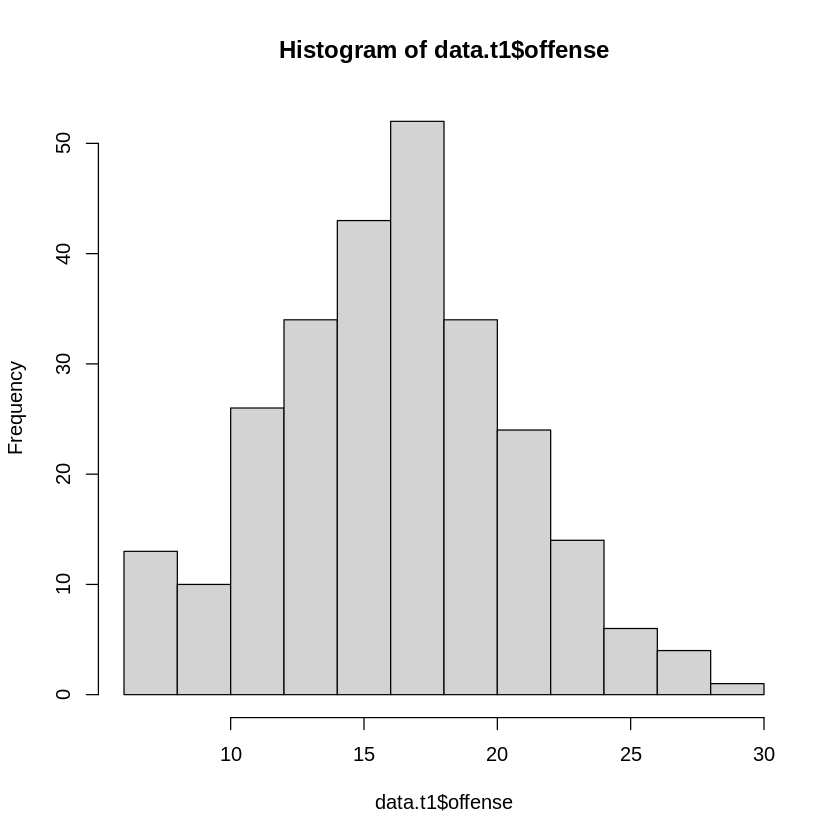

In [13]:
hist(data.t1$offense)

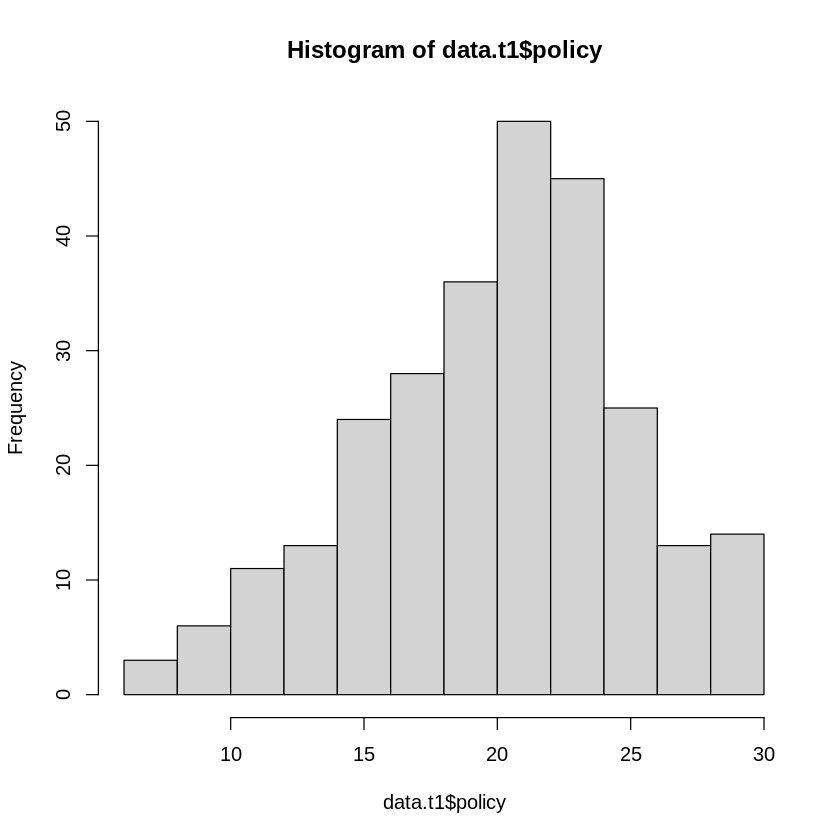

In [14]:
hist(data.t1$policy)

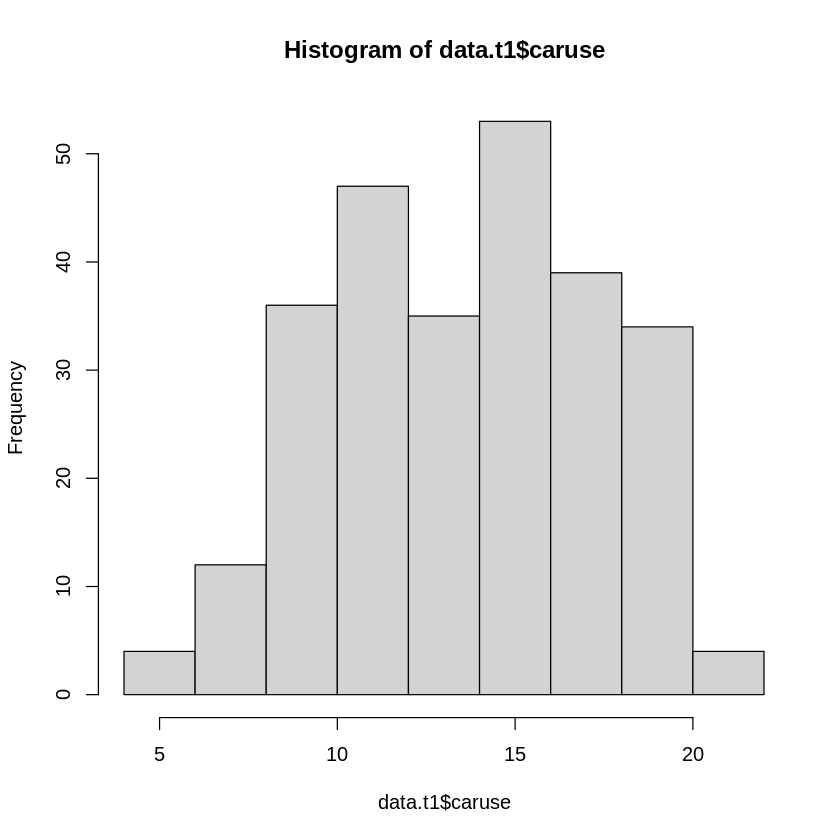

In [15]:
hist(data.t1$caruse)

what about scatter plots

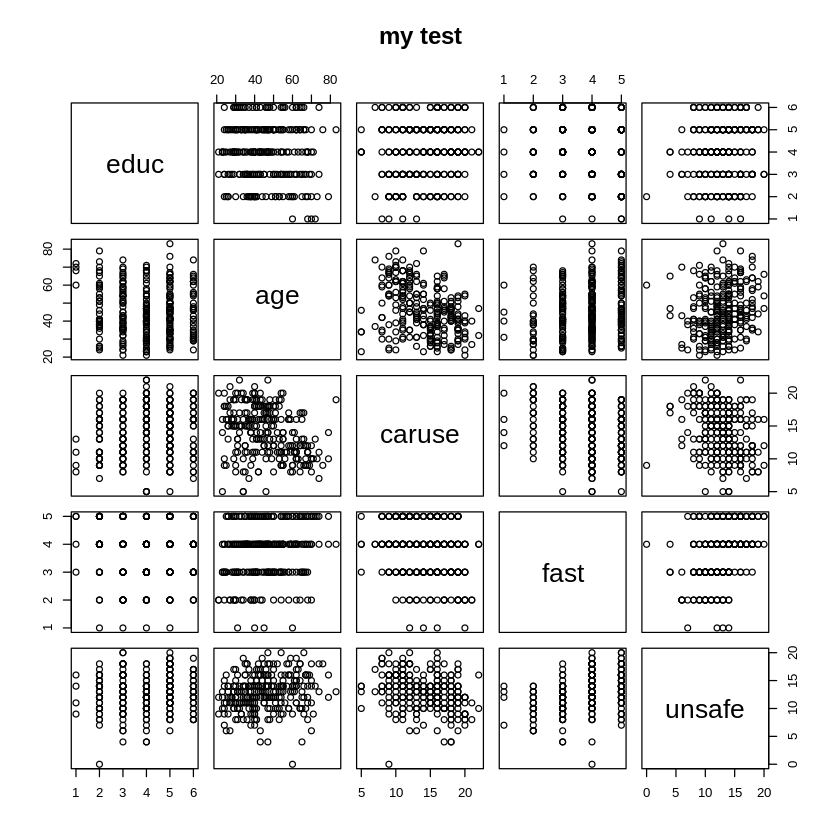

In [16]:
pairs(~educ+age+caruse+fast+unsafe,data=data.t1, main="my test")

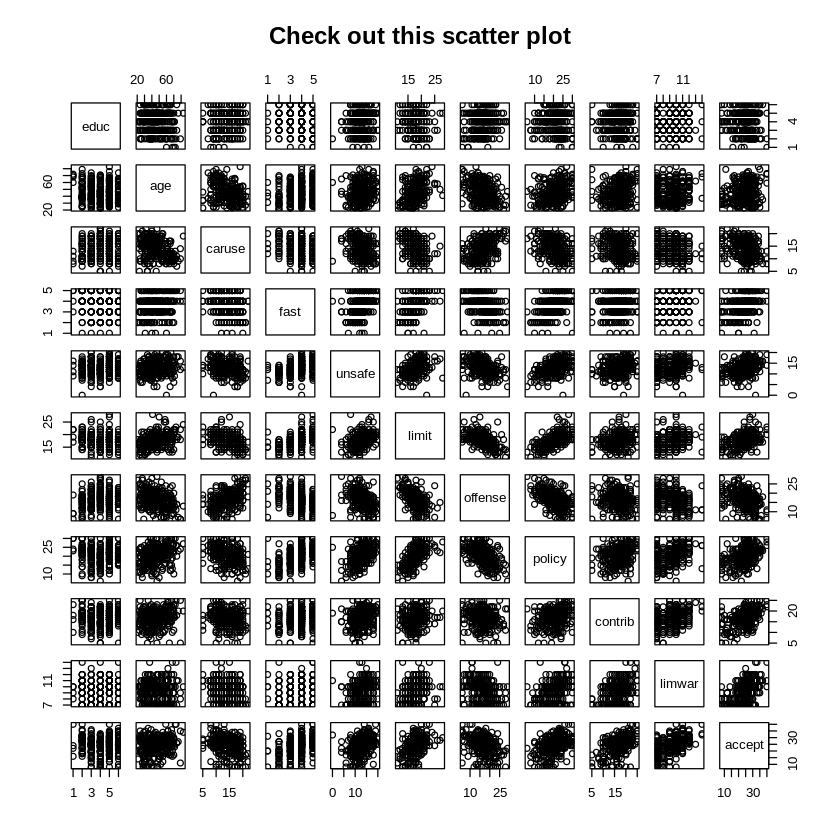

In [17]:
pairs(~educ+age+caruse+fast+unsafe+limit+offense+policy+contrib+limwar+accept,data=data.t1, main="Check out this scatter plot")

ok, enough with the graphics let's get back to business,
let's run a regression:

In [18]:
lm(accept~gender+educ+age+caruse+fast+unsafe+limit+offense,data = data.t1)


Call:
lm(formula = accept ~ gender + educ + age + caruse + fast + unsafe + 
    limit + offense, data = data.t1)

Coefficients:
(Intercept)       gender         educ          age       caruse         fast  
   12.37398      0.97542     -0.02808      0.02877     -0.14575      1.28751  
     unsafe        limit      offense  
    0.20546      0.43698     -0.17236  


cool, do you want to know how long it took to run this regression? let's check it out

In [19]:
system.time(lm(accept~gender+educ+age+caruse+fast+unsafe+limit+offense,data = data.t1))

   user  system elapsed 
  0.002   0.000   0.002 


well it says this was almost zero!, system.time is a useful function to compare options when programming and design efficient code
 of coruse running lm by itself gives you litle information, let's get more information of this regression,
 first let's save the regression as an object,

In [20]:
my.first.Rregression<-lm(accept~gender+educ+age+caruse+fast+unsafe+limit+offense,data = data.t1)

let's check which type of object this is:

In [21]:
class(my.first.Rregression)

[1] "lm"

ok, give me more information:

In [22]:
summary(my.first.Rregression)


Call:
lm(formula = accept ~ gender + educ + age + caruse + fast + unsafe + 
    limit + offense, data = data.t1)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0647  -3.5225   0.5924   3.5535  13.9462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 12.37398    4.83100   2.561  0.01105 * 
gender       0.97542    0.92877   1.050  0.29469   
educ        -0.02808    0.28931  -0.097  0.92276   
age          0.02877    0.03120   0.922  0.35734   
caruse      -0.14575    0.11110  -1.312  0.19083   
fast         1.28751    0.45940   2.803  0.00549 **
unsafe       0.20546    0.13075   1.571  0.11743   
limit        0.43698    0.18768   2.328  0.02074 * 
offense     -0.17236    0.10322  -1.670  0.09629 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.644 on 236 degrees of freedom
  (27 observations deleted due to missingness)
Multiple R-squared:  0.2804,	Adjusted R-squared:  0.256 
F-statistic:  11.5

ok, now let's access these data directly,
first let's check which data is inside "my.first.Rregression"

In [23]:
names(my.first.Rregression)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "na.action"     "xlevels"       "call"          "terms"        
[13] "model"

Nice, so let's save each independent piece in an object:

In [25]:
my.Coef<-my.first.Rregression$coefficients
my.Coef

(Intercept)      gender        educ         age      caruse        fast 
12.37398131  0.97541664 -0.02808031  0.02877177 -0.14574798  1.28750545 
     unsafe       limit     offense 
 0.20545704  0.43697552 -0.17235616

In [26]:
class(my.Coef)

[1] "numeric"

In [ ]:
my.Coef["gender"]

Ok, let's get all the other stuff we typically need:

In [27]:
  my.SSR <- deviance(my.first.Rregression) #residual sum of squares
  my.SSR

[1] 7516.52

In [28]:
  my.LL <- logLik(my.first.Rregression) # log likelihood statistic
  my.LL

'log Lik.' -767.031 (df=10)

In [29]:
  my.DegreesOfFreedom <- my.first.Rregression$df # degrees of fredom
  my.DegreesOfFreedom

[1] 236

In [30]:
  my.Yhat <- my.first.Rregression$fitted.values # vector of fitted values
  my.Yhat

1        2        3        4        5        6        7        8 
23.72411 27.82093 19.46720 26.31576 25.78983 18.11617 20.52035 25.41105 
       9       10       11       12       13       14       15       16 
23.17928 22.88802 21.91428 22.42849 26.77715 23.61992 25.84792 19.67879 
      17       18       19       20       21       22       23       24 
22.34867 26.84875 23.46219 22.04007 22.09842 24.23096 27.52984 20.85278 
      25       27       28       29       30       31       32       33 
26.11490 24.61749 24.19796 29.95375 18.59300 23.96309 27.92017 27.44548 
      34       35       36       37       38       39       41       42 
28.31167 21.47793 24.32707 20.88009 31.22746 27.97950 16.50178 21.72538 
      43       44       45       46       47       48       49       51 
22.05097 24.96425 18.23802 25.74030 21.50944 16.24879 20.42194 19.67387 
      52       53       54       55       56       57       58       59 
26.30828 21.88145 29.72193 14.77530 23.36192 22.26074 21.08114 25.47176 
      60       61       62       63       64       65       66       67 
18.97692 24.65062 27.65136 24.94294 24.16572 19.52245 22.35446 23.77271 
      68       69       70       71       72       73       74       75 
26.68016 26.05761 27.06472 17.94065 21.96584 22.20618 27.22889 27.39736 
      76       77       79       80       81       82       83       84 
30.14997 21.55252 26.98725 22.29377 20.87279 29.09032 27.88782 22.73436 
      85       86       87       88       89       90       91       92 
27.10196 20.44812 29.80280 24.12553 28.92426 28.97152 27.57434 28.61282 
      93       94       95       96       97       98       99      101 
27.40008 25.47773 16.35717 27.42009 29.60234 25.12837 15.46900 19.67035 
     104      105      107      108      109      110      111      112 
16.96815 28.43889 28.37932 27.16470 19.30566 22.90541 19.02053 29.42005 
     113      115      116      117      118      119      121      122 
24.90461 25.63064 28.84203 24.43976 27.02075 21.92673 21.41989 20.74463 
     123      124      125      126      127      128      129      130 
26.19510 28.72265 26.26382 26.02879 24.13755 21.82389 28.40125 28.99943 
     131      132      133      134      135      136      137      138 
26.77308 23.93463 19.69967 22.54753 28.15600 24.98533 19.41246 26.27496 
     139      140      141      142      146      148      149      151 
25.11021 24.35245 23.32389 24.36142 26.56573 22.41903 20.72315 21.35932 
     152      153      155      157      158      159      161      162 
30.01910 24.64610 21.84395 26.26189 28.50754 26.47526 30.09458 28.40395 
     163      165      166      167      168      169      170      171 
28.16106 25.38589 20.74181 23.17099 24.44653 27.89902 23.65375 25.82832 
     172      173      174      175      177      178      179      180 
18.35164 25.12878 28.47871 17.40137 20.99378 23.51354 23.87747 26.47548 
     182      183      184      186      187      188      189      190 
28.22293 28.64496 30.31715 21.73165 27.58996 23.16744 23.01434 27.17410 
     191      192      193      194      196      197      198      199 
26.11703 24.33168 20.35057 19.68510 16.33895 24.95238 29.97225 21.34077 
     200      201      202      203      205      206      207      208 
23.46649 18.99887 26.30356 22.23568 24.67492 26.15111 26.86827 28.45786 
     209      210      211      212      213      214      215      216 
27.02489 22.72236 28.06947 28.09885 20.96038 30.41599 26.90199 19.81797 
     217      218      219      220      221      222      223      224 
22.61783 26.29776 23.56570 24.87734 23.48500 20.66197 25.20563 22.60435 
     225      226      227      228      229      230      231      232 
18.20335 21.01383 18.15705 27.87412 23.60176 20.71069 23.93416 19.65456 
     233      234      235      236      237      239      240      241 
23.79135 22.16784 25.37547 25.16890 25.67474 26.70481 25.40759 22.99924 
     242      243      244      245      246      247      248   

In [31]:
  my.Coef <- my.first.Rregression$coefficients # coefficients
  my.Coef

(Intercept)      gender        educ         age      caruse        fast 
12.37398131  0.97541664 -0.02808031  0.02877177 -0.14574798  1.28750545 
     unsafe       limit     offense 
 0.20545704  0.43697552 -0.17235616

In [32]:
my.Resid <- my.first.Rregression$residuals # vector of residuals
my.Resid

1            2            3            4            5            6 
  8.27588632   0.17906735   0.53279941  -8.31575557  -0.78982772   1.88382670 
           7            8            9           10           11           12 
 -1.52035101   1.58894751   0.82072405   2.11197811   3.08571862   3.57151317 
          13           14           15           16           17           18 
 -6.77715258  -7.61991825   4.15208297   7.32121391  -8.34867414   4.15124706 
          19           20           21           22           23           24 
  1.53780526   2.95993371  -8.09841923  -1.23096248   3.47016469   0.14722279 
          25           27           28           29           30           31 
  1.88509596  -5.61748679   6.80203637  -5.95375161   0.40699988  -2.96308605 
          32           33           34           35           36           37 
  6.07982936   5.55451876  -5.31166569  -4.47793368 -12.32707247  -0.88008624 
          38           39           41           42           43           44 
 -3.22745666  -4.97950000  -2.50178324   3.27462087   2.94903122   2.03574560 
          45           46           47           48           49           51 
  0.76197850  -5.74030059   5.49056110   0.75121067   2.57805771 -11.67386560 
          52           53           54           55           56           57 
  2.69171988  -3.88144675  -1.72192659  -3.77530262 -11.36192184   4.73926189 
          58           59           60           61           62           63 
  5.91885776  -1.47175903  -1.97691505   3.34937784  -3.65135529  -8.94293738 
          64           65           66           67           68           69 
  9.83427662  -3.52245489   2.64553515  -1.77270568  -2.68016202   5.94239417 
          70           71           72           73           74           75 
-17.06471758   2.05935430   7.03415554   1.79382064   0.77110752  -0.39736132 
          76           77           79           80           81           82 
  4.85003053  -1.55252080  -0.98725127  -3.29377094   3.12721391   0.90967617 
          83           84           85           86           87           88 
-11.88781734   3.26563510   6.89804224 -12.44811866  -6.80280238   5.87446858 
          89           90           91           92           93           94 
 -1.92425585   7.02848097   4.42566226  -0.61282066  -2.40008430   1.52227275 
          95           96           97           98           99          101 
  5.64283273  -3.42008879  -5.60234099   2.87162700   4.53099519 -11.67035364 
         104          105          107          108          109          110 
 -0.96815200  -4.43889022  -1.37931781   2.83530458   9.69434366  -4.90540682 
         111          112          113          115          116          117 
 -3.02052665  -4.42005341   1.09538917   3.36936172  -1.84202852 -12.43976009 
         118          119          121          122          123          124 
  5.97924970  -4.92672802   5.58011397   6.25537080   5.80490218   1.27734808 
         125          126          127          128          129          130 
  0.73618377  -0.02879353   6.86244815   2.17611154   2.59874717  -3.99942861 
         131          132          133          134          135          136 
 -1.77307519  11.06536995   0.30032785   7.45246743   0.84399587  -0.98532804 
         137          138          139          140          141          142 
  0.58754125  -7.27496447   1.88979146   4.64754878   5.67610895  -1.36141776 
         146          148          149          151          152          153 
 -0.56572685   3.58096683 -10.72314534   2.64067678  -4.01910032  -1.64609983 
         155          157          158          159          161          162 
-11.84395097  -8.26189449   1.49246380   0.52473524  -5.09458139  -2.40395057 
         163          165          166          167          168          169 
  7.83893745  -3.38588582   1.25819427  -5.17098509   3.55347327   0.10097621 
         170          171          172          173          

In [33]:
my.s <- summary(my.first.Rregression)$sigma
my.s

[1] 5.64355

In [34]:
my.RSquared <- summary(my.first.Rregression)$r.squared
my.RSquared

[1] 0.280428

In [35]:
my.CovMatrix <- my.s^2*summary(my.first.Rregression)$cov # variance-covariance matrix of
my.CovMatrix

,(Intercept),gender,educ,age,caruse,fast,unsafe,limit,offense
(Intercept),23.33857275,0.016911365,-0.254428797,-4.046427e-02,-0.2052593023,-0.3480399864,-1.234152e-01,-0.545650213,-0.2908109893
gender,0.01691136,0.862615763,-0.032000846,7.585165e-03,0.0088721772,-0.0511437963,-1.067645e-02,-0.018768670,0.0060011604
educ,-0.25442880,-0.032000846,0.083698316,-1.877810e-04,-0.0027628422,0.0051947039,-5.853275e-03,0.004164646,-0.0028152536
age,-0.04046427,0.007585165,-0.000187781,9.732931e-04,0.0006627619,0.0008356778,-5.455601e-05,-0.001419715,0.0004886019
caruse,-0.20525930,0.008872177,-0.002762842,6.627619e-04,0.0123428164,-0.0025180335,2.018666e-03,0.002066247,-0.0026051663
fast,-0.34803999,-0.051143796,0.005194704,8.356778e-04,-0.0025180335,0.2110450672,-1.392592e-02,-0.023705992,0.0085730976
unsafe,-0.12341515,-0.010676455,-0.005853275,-5.455601e-05,0.0020186655,-0.0139259180,1.709519e-02,-0.003762482,0.0013243201
limit,-0.54565021,-0.018768670,0.004164646,-1.419715e-03,0.0020662474,-0.0237059919,-3.762482e-03,0.035224078,0.0049462078
offense,-0.29081099,0.006001160,-0.002815254,4.886019e-04,-0.0026051663,0.0085730976,1.324320e-03,0.004946208,0.0106548971


In [36]:
my.aic <- AIC(my.first.Rregression) # Akaike information criterion
my.aic

[1] 1554.062

probably you want to do this more automatically, let's write a function
the function below does all the process above
can you understand the syntax ?

In [37]:
my.first.function<-function(dependent.variable,independent.variables)
{
 paste(independent.variables,collapse = "+")
 model <- paste(dependent.variable,"~",paste(independent.variables,collapse = "+"),collapse="")
 linear.model<-lm(as.formula(model), data=data.t1)
  my.SSR <- deviance(linear.model) #residual sum of squares
  my.LL <- logLik(linear.model) # log likelihood statistic
  my.DegreesOfFreedom <- linear.model$df # degrees of fredom
  my.Yhat <- linear.model$fitted.values # vector of fitted values
  my.Coef <- linear.model$coefficients # coefficients
  my.Resid <- linear.model$residuals # vector of residuals
  my.s <- summary(linear.model)$sigma
  my.RSquared <- summary(linear.model)$r.squared
  my.CovMatrix <- my.s^2*summary(linear.model)$cov # variance-covariance matrix of
  my.aic <- AIC(linear.model) # Akaike information criterion
  results<-data.frame(SSR=my.SSR,LL=my.LL,DF=my.DegreesOfFreedom,RSquared=my.RSquared,AIC=my.aic)
  return(results)
}

since we have defined this function, now we can use it:
 the function has two arguments:
 the first argument indicates the dependent variable
 the second arugment indicates the independent variables
let's try this example:

In [38]:
 my.first.function("accept",c("gender","educ","age","caruse","fast","unsafe","limit","offense"))

SSR,LL,DF,RSquared,AIC
<dbl>,<dbl>,<int>,<dbl>,<dbl>
7516.52,-767.031,236,0.280428,1554.062



let's try this other example

In [39]:
my.first.function("accept",c("gender","educ","age","caruse"))

SSR,LL,DF,RSquared,AIC
<dbl>,<dbl>,<int>,<dbl>,<dbl>
9478.286,-833.6961,254,0.1502155,1679.392


interesting, can we do this over all possible specifications for the data set we have?
let's generate a table with all possible combinations

In [40]:
vars<-list(var1=c(colnames(data.t1)[1],""),
           var2=c(colnames(data.t1)[2],""),
	         var3=c(colnames(data.t1)[3],""),
	         var4=c(colnames(data.t1)[4],""),
	         var5=c(colnames(data.t1)[5],""),
	         var6=c(colnames(data.t1)[6],""),
	         var7=c(colnames(data.t1)[7],""),
	         var8=c(colnames(data.t1)[8],""),
	         var9=c(colnames(data.t1)[9],""),
	         var10=c(colnames(data.t1)[10],""),
	         var11=c(colnames(data.t1)[11],""),
	         var13=c(colnames(data.t1)[13],""))
all.vars<-expand.grid(vars)

now let's estimate OLS for all possible combinations

first let's try one case:

In [41]:
my.first.function("accept",c(
                             as.character(all.vars[1,'var1']),
                             as.character(all.vars[1,'var2']),
                             as.character(all.vars[1,'var3']),
                             as.character(all.vars[1,'var4']),
                             as.character(all.vars[1,'var5']),
                             as.character(all.vars[1,'var6']),
                             as.character(all.vars[1,'var7']),
                             as.character(all.vars[1,'var8']),
                             as.character(all.vars[1,'var9']),
                             as.character(all.vars[1,'var10'])
                             )
                  )

SSR,LL,DF,RSquared,AIC
<dbl>,<dbl>,<int>,<dbl>,<dbl>
5927.78,-725.3572,229,0.4281507,1474.714


now let's use the apply function to this over the entire possible combinations

In [42]:
regress<-apply(all.vars[1:20,],1,function(x){

                            my.first.function("accept",c(
                                                         as.character(x['var1']),
                                                         as.character(x['var2']),
                                                         as.character(x['var3']),
                                                         as.character(x['var4']),
                                                         as.character(x['var5']),
                                                         as.character(x['var6']),
                                                         as.character(x['var7']),
                                                         as.character(x['var8']),
                                                         as.character(x['var9']),
                                                         as.character(x['var10'])
                                                        )
                                              )
                               }
                 )


regress is a list, you can check it out

In [43]:
class(regress)

[1] "list"

you can put everything on a table with do.call

In [44]:
regress<-do.call('rbind',regress)

In [45]:
subset(regress,RSquared==max(regress$RSquared))

,SSR,LL,DF,RSquared,AIC
,<dbl>,<dbl>,<int>,<dbl>,<dbl>
15,6055.407,-745.5937,239,0.4329184,1509.187


find the model with the highes R squared